# Chapter 4 Exercises

:::{exercise}
:label: ch4-ex-erk-stability-function

Determine the stability function of the following Runge-Kutta method

$$ \begin{array}{c|ccccc}
    0 &  &  &  &  & \\
    1/4 & 1/4 &  &  &  & \\
    1/2 & 1/2 & 0 &  &  & \\
    3/4 & 0 & 1/2 & 1/4 &  &    \\
    0 & 0 & 1/6 & -1/3 & 1/6 & \\ \hline
    & -1 & 2/3 & -1/3 & 2/3 & 1
\end{array} $$
:::

::::::{solution} ch4-ex-erk-stability-function
:class: dropdown

$$ \begin{align*}
    \mathbf{b} A^0 \mathbf{e} &= 
    \begin{pmatrix} -1 \\ 2/3 \\ -1/3 \\ 2/3 \\ 1 \end{pmatrix}
    \begin{pmatrix} 
        1 & 0 & 0 & 0 & 0 \\
        0 & 1 & 0 & 0 & 0 \\
        0 & 0 & 1 & 0 & 0 \\
        0 & 0 & 0 & 1 & 0 \\
        0 & 0 & 0 & 0 & 1 
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}
    = 1, \\
    \mathbf{b} A^1 \mathbf{e} &= 
    \begin{pmatrix} -1 \\ 2/3 \\ -1/3 \\ 2/3 \\ 1 \end{pmatrix}
    \begin{pmatrix} 
        0 & 0 & 0 & 0 & 0 \\
        1/4 & 0 & 0 & 0 & 0 \\
        1/2 & 0 & 0 & 0 & 0 \\
        0 & 1/2 & 1/4 & 0 & 0 \\
        0 & 1/6 & -1/3 & 1/6 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}
    = \frac{1}{2}, \\
    \mathbf{b} A^2 \mathbf{e} &= 
    \begin{pmatrix} -1 \\ 2/3 \\ -1/3 \\ 2/3 \\ 1 \end{pmatrix}
    \begin{pmatrix} 
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 \\
        1/4 & 0 & 0 & 0 & 0 \\
        -1/8 & 1/12 & 1/24 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}
    = \frac{1}{6}, \\
    \mathbf{b} A^3 \mathbf{e} &= 
    \begin{pmatrix} -1 \\ 2/3 \\ -1/3 \\ 2/3 \\ 1 \end{pmatrix}
    \begin{pmatrix} 
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 \\
        1/24 & 0 & 0 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}
    = \frac{1}{24}, \\
    \mathbf{b} A^4 \mathbf{e} &= 
    \begin{pmatrix} -1 \\ 2/3 \\ -1/3 \\ 2/3 \\ 1 \end{pmatrix}
    \begin{pmatrix} 
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0 \\
        0 & 0 & 0 & 0 & 0
    \end{pmatrix}
    \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}
    = 0, \\
\end{align*} $$

So the stability function is $R(z) = 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \frac{1}{24} z^4$

Code 

:::::{tab-set}
::::{tab-item} Python
```python
from sympy import *

# Define ERK method
A = Matrix([[0, 0, 0, 0, 0], 
            [Rational(1,4), 0, 0, 0, 0], 
            [Rational(1,2), 0, 0, 0, 0], 
            [0, Rational(1,2), Rational(1,4), 0, 0], 
            [0, Rational(1,6), -Rational(1,3), Rational(1,6), 0]])
b = Matrix([[-1], [Rational(2,3)], [-Rational(1,3)], [Rational(2,3)], [1]])
e = ones(5, 1)

# Calculate coefficients
for k in range(1, len(b) + 1):
    print((b.T * A ** (k - 1) * e)[0])
```
::::

::::{tab-item} MATLAB
```matlab
% Define ERK method
A = [0, 0, 0, 0, 0 ; 
    1/4, 0, 0, 0, 0 ; 
    1/2, 0, 0, 0, 0 ;
    0, 1/2, 1/4, 0, 0 ;
    0, 1/6, -1/3, 1/6, 0];
b = [-1 ; 2/3 ; -1/3 ; 2/3 ; 1];
e = ones(5, 1);

% Calculate coefficients
for k = 1 : length(b)
    sym(b' * A ^ (k - 1) * e)
end
```
::::
:::::
::::::

In [15]:
import sympy as sp

# Define ERK method
A = sp.Matrix([[0, 0, 0, 0, 0], 
            [sp.Rational(1,4), 0, 0, 0, 0], 
            [sp.Rational(1,2), 0, 0, 0, 0], 
            [0, sp.Rational(1,2), sp.Rational(1,4), 0, 0], 
            [0, sp.Rational(1,6), -sp.Rational(1,3), sp.Rational(1,6), 0]])
b = sp.Matrix([[-1], [sp.Rational(2,3)], [-sp.Rational(1,3)], [sp.Rational(2,3)], [1]])
e = sp.ones(5, 1)

# Calculate coefficients
for k in range(1, len(b) + 1):
    display(b.T * A ** (k - 1) * e)

Matrix([[1]])

Matrix([[1/2]])

Matrix([[1/6]])

Matrix([[1/24]])

Matrix([[0]])

:::{exercise}
:label: ch4-ex-irk-stability-function

Determine the stability function of the following Runge-Kutta method. Is this an A-stable method?

$$ \begin{array}{c|cc}
    1/4 & 7/24 & -1/24\\
    3/4 & 13/24 & 5/24\\ \hline
    & 1/2 & 1/2
\end{array} $$
:::

::::::{solution} ch4-ex-irk-stability-function
:class: dropdown

\begin{align*}
    R(z) &= \frac{\det \left( 
    \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} - z
    \begin{pmatrix} 7/24 & -1/24 \\ 13/24 & 5/24 \end{pmatrix} + z
    \begin{pmatrix} 1/2 & 0 \\ 0 & 1/2 \end{pmatrix} \right)}{\det \left(
    \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} - z
    \begin{pmatrix} 7/24 & -1/24 \\ 13/24 & 5/24 \end{pmatrix} \right)} \\
    &= \frac{\det 
    \begin{pmatrix} 1 + 5z/24 & z/24 \\ -13z/24 & 1 + 7z/24 \end{pmatrix}}{\det
    \begin{pmatrix} 1 - 7z/24 & z/24 \\ -13z/34 & 1 - 5z/24 \end{pmatrix}}
    = \frac{1 + \frac{1}{2} z + \frac{1}{12} z^2}{1 - \frac{1}{2} z + \frac{1}{12} z^2}.
\end{align*}

Check the roots of $Q(z)$
\begin{align*}
    0 &= 1 - \frac{1}{2} z + \frac{1}{12} z^2, \\
    \therefore z &= \frac{\frac{1}{2} \pm \sqrt{-\frac{1}{3}}}{\frac{1}{6}}
    = 3 \pm \sqrt{3}i,
\end{align*}
so the roots of $Q(z)$ have positive real parts so the first condition for A-stability is satisfied.

Check that $E(y) \geq 0$

\begin{align*}
    E(y) &= \left( 1 - \frac{1}{2} i y - \frac{1}{12} y^2 \right)
    \left( 1 + \frac{1}{2} i y - \frac{1}{12} y^2 \right) \\
    & \qquad -
    \left( 1 - \frac{1}{2} i y - \frac{1}{12} y^2 \right)
    \left( 1 + \frac{1}{2} i y - \frac{1}{12} y^2 \right) = 0
\end{align*}

so $E(y) \geq 0$ and the second condition for A-stability is satisfied. Since both conditions are satisfied then this method is A-stable

Code

:::::{tab-set}
::::{tab-item} Python
```python
import sympy as sp

# Define numerator and denominator functions
def P(z):
    return (I - z * A + z * ebT).det()

def Q(z):
    return (I - z * A).det()

# Define RK method
A = sp.Matrix([[sp.Rational(7,24), -sp.Rational(1,24)], [sp.Rational(13,24), sp.Rational(5,24)]])
ebT = sp.Matrix([[sp.Rational(1,2), 0], [0, sp.Rational(1,2)]])
I = sp.eye(2)

# Calculate R(z)
z, y = sp.symbols('z, y')
R = P(z) / Q(z)
print("R(z) = ")
display(R)

# Check roots of Q have positive real parts
print('roots of Q(z) = ')
display(sp.solve(Q(z)))

# Check E(y) >= 0
E = Q(1j * y) * Q(-1j * y) - P(1j * y) * P(-1j * y)
print('E(y) = ')
display(sp.simplify(sp.nsimplify(E)))
```
::::

::::{tab-item} MATLAB
```matlab
% Define IRK method
A = [7/24, -1/24 ; 13/24, 5/24];
ebT = [1/2, 0 ; 0, 1/2];
I = eye(2);

% Calculate R(z)
syms z y

P = @(z) det(I - z * A + z * ebT);
Q = @(z) det(I - z * A);

Rz = P(z) / Q(z)

% Check roots of Q have positive real parts
solve(Q(z) == 0)

% Check E(y) >= 0
E = Q(1i * y) * Q(-1i * y) - P(1i * y) * P(-1i * y)
```
::::
:::::
::::::

In [18]:
import sympy as sp

# Define numerator and denominator functions
def P(z):
    return (I - z * A + z * ebT).det()

def Q(z):
    return (I - z * A).det()

# Define RK method
A = sp.Matrix([[sp.Rational(7,24), -sp.Rational(1,24)], [sp.Rational(13,24), sp.Rational(5,24)]])
ebT = sp.Matrix([[sp.Rational(1,2), 0], [0, sp.Rational(1,2)]])
I = sp.eye(2)

# Calculate R(z)
z, y = sp.symbols('z, y')
R = P(z) / Q(z)
print("R(z) = ")
display(R)

# Check roots of Q have positive real parts
print('roots of Q(z) = ')
display(sp.solve(Q(z)))

# Check E(y) >= 0
E = Q(1j * y) * Q(-1j * y) - P(1j * y) * P(-1j * y)
print('E(y) = ')
display(sp.simplify(sp.nsimplify(E)))

R(z) = 


(z**2/12 + z/2 + 1)/(z**2/12 - z/2 + 1)

roots of Q(z) = 


[3 - sqrt(3)*I, 3 + sqrt(3)*I]

E(y) = 


0

:::{exercise}
:label: ch2-ex-dirk-stability-function

Plot the region of absolute stability for the following Runge-Kutta method.

$$ \begin{array}{c|cc}
    1/3 & 1/3 & 0\\
    1 & 1 & 0\\ \hline
    & 3/4 & 1/4
\end{array} $$
:::

::::::{solution} ch2-ex-dirk-stability-function
:class: dropdown

Determine the stability function
\begin{align*}
    R(z) &= \frac{\left( 
    \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} - z
    \begin{pmatrix} 1/3 & 0 \\ 1 & 0 \end{pmatrix} - z
    \begin{pmatrix} 3/4 & 0 \\ 0 & 1/4 \end{pmatrix} \right)}{ \det \left(
    \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} - z
    \begin{pmatrix} 1/3 & 0 \\ 1 & 0 \end{pmatrix} \right)} \\
    &= \frac{\det
    \begin{pmatrix} 1 - 13z/12 & 0 \\ -z & 1 - z/4 \end{pmatrix}}{\det
    \begin{pmatrix} 1 - z/3 & 0  \\ -z & 1 \end{pmatrix}}
    = \frac{1 + 2/3 z + \frac{5}{48} z^2}{1 - 1/3 z}
\end{align*}

Plot 

:::{glue:figure} ex4.3_plot
:figwidth: 600
:::

Code

:::::{tab-set}
::::{tab-item} Python

Determine stability function

```python
import sympy as sp

# Define RK method
A = sp.Matrix([[sp.Rational(1,3), 0], [1, 0]])
ebT = sp.Matrix([[sp.Rational(3,4), 0], [0, sp.Rational(1,4)]])
I = sp.eye(2)

# Define numerator and denominator functions
def P(z):
    return (I - z * A + z * ebT).det()

def Q(z):
    return (I - z * A).det()


# Calculate R(z)
z, y = sp.symbols('z, y')
Rz = P(z) / Q(z)
print("R(z) = ")
display(sp.nsimplify(Rz))
```

Plot region of absolute stability

```python
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

# Generate z values
X, Y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
Z = X + Y * 1j

# Define stability function
R = (1 + 2 / 3 * Z + 5 / 48 * Z ** 2) / (1 - 1 / 3 * Z)

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)
plt.axis("equal")
plt.axis([-15, 5, -7, 7])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()
```
::::

::::{tab-item} MATLAB
Determine stability function

```matlab
% Define IRK method
A = [1/3, 0 ; 1, 0];
ebT = [3/4, 0 ; 0, 1/4];
I = eye(2);

% Calculate R(z)
syms z y

P = @(z) det(I - z * A + z * ebT);
Q = @(z) det(I - z * A);

Rz = P(z) / Q(z)
```

Plot region of absolute stability

```matlab
% Generate z values
[X, Y] = meshgrid(linspace(-10, 10, 200), linspace(-10, 10, 200));
Z = X + Y * 1i;

% Define stability function
R = (1 + 2 / 3 * Z + 5 / 48 * Z .^ 2) ./ (1 - 1 / 3 * Z);

% Plot stability region
contourf(X, Y, abs(R), [0, 1], LineWidth=2)
xline(0, LineWidth=2)
yline(0, LineWidth=2)
colormap([153, 204, 255 ; 255, 255, 255] / 255)
axis equal
axis([-15, 5, -7, 7])
xlabel("$\mathrm{Re}(z)$", FontSize=12, Interpreter="latex")
ylabel("$\mathrm{Im}(z)$", FontSize=12, Interpreter="latex")
```
::::
:::::
::::::

In [1]:
import sympy as sp

# Define RK method
A = sp.Matrix([[sp.Rational(1,3), 0], [1, 0]])
ebT = sp.Matrix([[sp.Rational(3,4), 0], [0, sp.Rational(1,4)]])
I = sp.eye(2)

# Define numerator and denominator functions
def P(z):
    return (I - z * A + z * ebT).det()

def Q(z):
    return (I - z * A).det()


# Calculate R(z)
z, y = sp.symbols('z, y')
Rz = P(z) / Q(z)
print("R(z) = ")
display(sp.nsimplify(Rz))

R(z) = 


(5*z**2/48 + 2*z/3 + 1)/(1 - z/3)

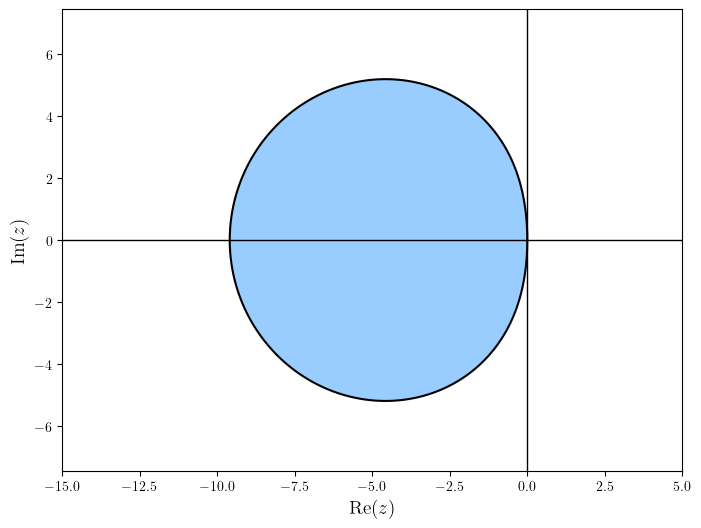

In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True  # allows use of LaTeX in labels

# Generate z values
X, Y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
Z = X + Y * 1j

# Define stability function
R = (1 + 2 / 3 * Z + 5 / 48 * Z ** 2) / (1 - 1 / 3 * Z)

# Plot stability region
fig = plt.figure(figsize=(8, 6))
plt.contourf(X, Y, abs(R), levels=[0, 1], colors="#99ccff")
plt.contour(X, Y, abs(R), colors= "k", levels=[0, 1])
plt.axhline(0, color="k", linewidth=1)
plt.axvline(0, color="k", linewidth=1)
plt.axis("equal")
plt.axis([-15, 5, -7, 7])
plt.xlabel("$\mathrm{Re}(z)$", fontsize=14)
plt.ylabel("$\mathrm{Im}(z)$", fontsize=14)
plt.show()

from myst_nb import glue
glue("ex4.3_plot", fig, display=False)

<!-- :::{exercise}
:label: ch4-ex-stiffness-ratio

Calculate the stiffness ratio for the following system of ODEs. 

\begin{align*}
    y_1' &= -80.6 y_1 + 119.4 y_2,\\
    y_2' &= 79.6 y_1 - 120.4 y_2.
\end{align*}

What are the maximum step lengths that the Euler method is stable for solving each equation?
:::

::::{solution} ch4-ex-stiffness-ratio
:class: dropdown

Calculate the eigenvalues of the coefficient matrix

\begin{align*}
    0 &= \begin{vmatrix} -80.6 - \lambda & 119.4 \\ 79.6 & -120.4 - \lambda \end{vmatrix}
    = \lambda^2 + 201 \lambda + 200, \\
    \therefore \lambda &= \frac{-201 \pm 199}{2} = -200, -1
\end{align*}

so the stiffness ratio is $S = 200$. The Euler method is stable for $h\lambda \in [-2, 0]$ so the maximum step length is 

$$h = \frac{-2}{\min(-200, -1)} = \frac{-2}{-200} = 0.01.$$
:::: -->

:::{exercise} 
:label: ch4-ex-vanderpol-stiffness

The stiffness ratio of a non-linear system of ODEs can be calculated using the eigenvalues of the Jacobian matrix $J$ at the equilibrium points 

$$ J = \begin{pmatrix} 
    \dfrac{\partial f_1}{\partial y_1} & \cdots & \dfrac{\partial f_1}{\partial y_n} \\
    \vdots & \ddots & \vdots \\
    \dfrac{\partial f_m}{\partial y_1} & \cdots & \dfrac{\partial y_m}{\partial y_n}
\end{pmatrix} $$

Determine the stiffness ratio of the van der Pol oscillator described by the second-order ODE

$$ y'' - \mu (1 - y^2) y' = 0, $$

when $\mu = 1000$. What does this tell you about the type of solver that is required. 

:::

:::{solution} ch4-ex-vanderpol-stiffness
:class: dropdown

Let $y_1 = y$ and $y_2 = y'$ then

$$ \begin{align*}
    y_1' &= y_2, \\
    y_2' &= \mu(1 - y_1^2) y_2 - y_1.
\end{align*} $$

The equilibrium points are where $y_1'=y_2'=0$ so

$$ \begin{align*}
    0 &= y_2, \\
    0 &= \mu(1 - y_1^2) y_2 - y_1, 
\end{align*} $$

so there is one equilibrium point at $(0,0)$. The Jacobian matrix is 

$$ \begin{align*}
    J &= 
    \begin{pmatrix} 
    0 & 1 \\
    -2\mu y_1 y_2 - 1 & \mu (1 - y_1^2)
    \end{pmatrix}
\end{align*} $$

so

$$ \begin{align*}
    J_{(0,0)} &=
    \begin{pmatrix}
        0 & 1 \\
        -1 & \mu
    \end{pmatrix}.
\end{align*} $$

The eigenvalues are $\lambda = (\mu \pm \sqrt{\mu^2 - 4}) /2$. When $\mu = 1000$ then the stiffness ratio is

$$ S = \frac{\frac{1000 + \sqrt{999996}}{2}}{\frac{1000 - \sqrt{999996}}{2}} = 999999. $$

Since the stiffness ratio is large then the van der Pol oscillator is a stiff ODE when $\mu = 1000$ and would require an implicit method to prevent small step lengths being used.
:::